<a href="https://colab.research.google.com/github/UsmanSharif001/VegetableAI/blob/main/Gr%C3%B8nsag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import itertools

In [ ]:
!rm -r veggies/
!git clone https://github.com/joneikholmkea/veggies

rm: cannot remove 'veggies/': No such file or directory
Cloning into 'veggies'...
remote: Enumerating objects: 21077, done.
remote: Total 21077 (delta 0), reused 0 (delta 0), pack-reused 21077 (from 1)
Receiving objects: 100% (21077/21077), 530.68 MiB | 29.15 MiB/s, done.
Resolving deltas: 100% (107/107), done.
Updating files: 100% (30010/30010), done.


In [ ]:
trainingFiles = "/content/veggies/trainRed"
testFiles = "/content/veggies/testRed"

In [ ]:
image_files = glob (trainingFiles + '/*/*.jpg')
folders = glob (trainingFiles + "/*")
folders

['/content/veggies/trainRed/Capsicum',
 '/content/veggies/trainRed/Pumpkin',
 '/content/veggies/trainRed/Cauliflower',
 '/content/veggies/trainRed/Cabbage',
 '/content/veggies/trainRed/Tomato',
 '/content/veggies/trainRed/Bitter_Gourd',
 '/content/veggies/trainRed/Bean',
 '/content/veggies/trainRed/Papaya',
 '/content/veggies/trainRed/Cucumber',
 '/content/veggies/trainRed/Potato',
 '/content/veggies/trainRed/Bottle_Gourd',
 '/content/veggies/trainRed/Carrot',
 '/content/veggies/trainRed/Broccoli',
 '/content/veggies/trainRed/Radish',
 '/content/veggies/trainRed/Brinjal']

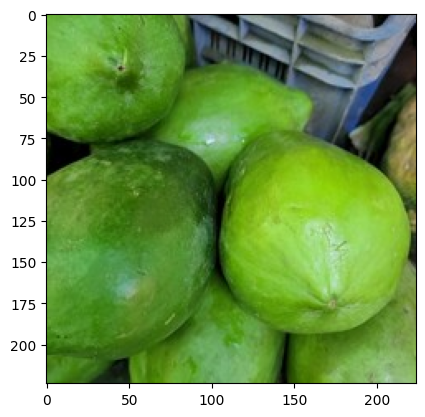

In [ ]:
plt.imshow(image.load_img(np.random.choice(image_files)))

In [ ]:
resNet = ResNet50(input_shape = (100, 100, 3), weights = 'imagenet', include_top = False) #include top betyder at den ikke skal konkludere maskinen vi vil gerne træne videre på den

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
for layer in resNet.layers:
  layer.trainable = False

In [ ]:
layers = Flatten()(resNet.output)
layers = Dense(30, activation="relu")(layers) #Ændret fra 30
layers = Dropout(0.15)(layers) #Overfitting lære sin maskine for godt for lokalt så når der kommer input udefra slår den fejl
layers = Dense(30, activation="relu")(layers) #Ændret fra 30
layers = Dense(len(folders), activation="softmax")(layers) # output layer

In [ ]:
model = Model(inputs = resNet.input, outputs=layers)

In [ ]:
model.compile(optimizer="adam", #Backpropgation
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
#model.summary()

In [ ]:
dataGen = ImageDataGenerator(
    rotation_range=20, #ændret fra 20
    width_shift_range=0.1, #ændret fra 0.1
    height_shift_range=0.1,
    shear_range=0.1, #KOMMENTAR Her ændre vi imagesne så vi træner maskinen til at kigge på billeder fra forskellige vinkler
                     #Derudover tager vi højde for at billederne også kan blive taget fra skæve / forsk. vinkler vi augmenterer virkeligheden.
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

In [ ]:
dataGenTest = ImageDataGenerator(
    preprocessing_function=preprocess_input
    )

In [ ]:
training_set = dataGen.flow_from_directory(
    trainingFiles,
    target_size=(100,100),
    batch_size=8, #ændret fra 128
    class_mode="sparse"
)

Found 3000 images belonging to 15 classes.


In [ ]:
test_set = dataGenTest.flow_from_directory(
    testFiles,
    target_size=(100,100),
    batch_size=8, #Ændret fra 128 #KOMMENTARE  Læser 8 billeder ad gangen
    class_mode="sparse"
)

Found 3000 images belonging to 15 classes.


In [ ]:
model.fit(
    training_set,
    #validation_data=test_set, #udkommenteret validation
    epochs=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 151s 378ms/step - accuracy: 0.1239 - loss: 2.7515
